In [1]:
import anndata as ad
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from utils import plot_iroot, comp_kde, kdeplot, kdeplot2, compare

In [3]:
d1 = ad.read_h5ad("data/dataseta0_processed.h5ad")
d2 = ad.read_h5ad("data/datasetb0_processed.h5ad")
d2.obs["milestones"] = d2.obs.milestones.cat.rename_categories({'sC': 'sC_batch'})

In [4]:
d1.write("data/fastmnn1.h5ad")
d2.write("data/fastmnn2.h5ad")

In [5]:
fastmnn= ad.read_h5ad("data/fastmnn_result.h5ad")

## Fastmnn

In [10]:
fastmnn

AnnData object with n_obs × n_vars = 1822 × 531
    obs: 'batch'
    obsm: 'corrected'

In [20]:
d1.obs

,step_ix,simulation_i,sim_time,milestones,leiden,dpt_pseudotime
cell1,4972,62,150.083333,sD,0,0.183115
cell2,7919,98,460.083333,sD,4,0.616939
cell3,54,1,380.083333,sEndD,4,0.655404
cell4,2870,36,190.000000,sD,0,0.143597
cell5,4848,60,530.083333,sEndC,5,0.933513
...,...,...,...,...,...,...
cell996,5932,74,30.083333,sB,3,0.071835
cell997,285,4,260.000000,sEndC,2,0.723212
cell998,2154,27,320.083333,sC,2,0.691167
cell999,6114,76,230.000000,sD,1,0.268930


In [21]:
fastmnn.obsm["X_fastmnn"] = fastmnn.obsm["corrected"]
fastmnn.obs["milestones"] = np.concatenate((d1.obs["milestones"], d2.obs["milestones"]))
fastmnn.obs["sim_time"] = np.concatenate((d1.obs["sim_time"], d2.obs["sim_time"]))
fastmnn.obs["batch"] = [0] * d1.shape[0] + [1] * d2.shape[0]

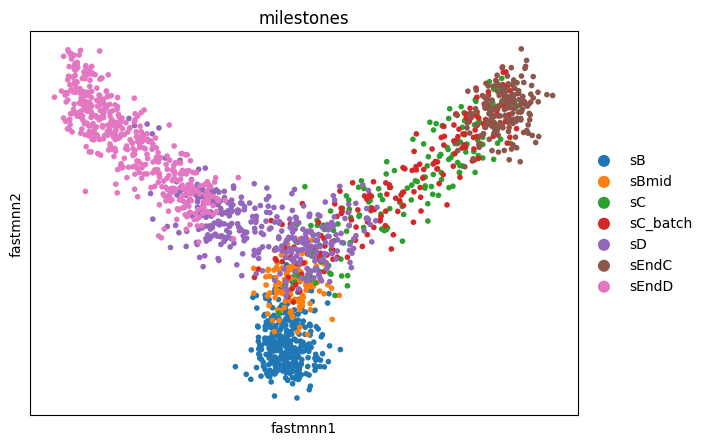

In [23]:
sc.pl.scatter(fastmnn, basis = "fastmnn", color = "milestones")

In [28]:
fastmnn.obs

,batch,milestones,sim_time,leiden
1,0,sD,150.083333,1
2,0,sD,460.083333,4
3,0,sEndD,380.083333,4
4,0,sD,190.000000,5
5,0,sEndC,530.083333,6
...,...,...,...,...
1818,1,sC_batch,160.000000,1
1819,1,sEndD,380.083333,0
1820,1,sD,240.000000,5
1821,1,sD,130.083333,5


In [ ]:
sc.pp.neighbors(fastmnn, use_rep="X_fastmnn")


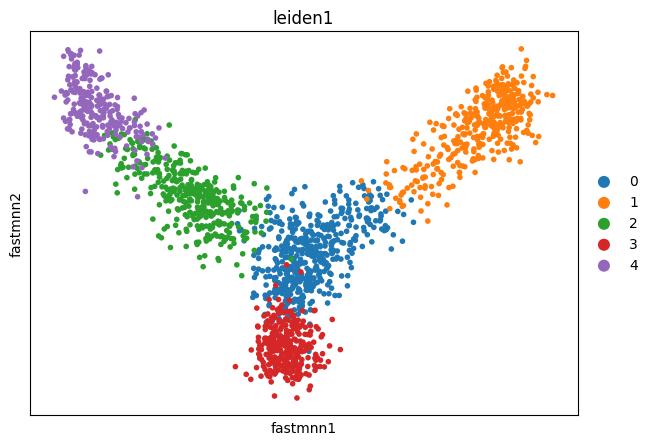

In [37]:
sc.tl.leiden(fastmnn, resolution=1, key_added="leiden1")
sc.pl.scatter(fastmnn, basis="fastmnn", color="leiden1")


In [39]:
fastmnn.write("data/fastmnn.h5ad")

## Pseudotime

In [3]:
fastmnn_result = ad.read_h5ad("data/fastmnn_slingshot.h5ad")

In [4]:
fastmnn_result

AnnData object with n_obs × n_vars = 1822 × 531
    obs: 'batch', 'milestones', 'sim_time', 'leiden', 'leiden1.5', 'leiden1.4', 'leiden1.25', 'leiden1.3', 'leiden1', 'slingPseudotime_1', 'slingPseudotime_2'
    uns: 'leiden', 'leiden1', 'leiden1.25', 'leiden1.25_colors', 'leiden1.3', 'leiden1.3_colors', 'leiden1.4', 'leiden1.4_colors', 'leiden1.5', 'leiden1.5_colors', 'leiden1_colors', 'leiden_colors', 'milestones_colors', 'neighbors'
    obsm: 'X_fastmnn', 'corrected'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/matplotlib/colors.py:2294: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin


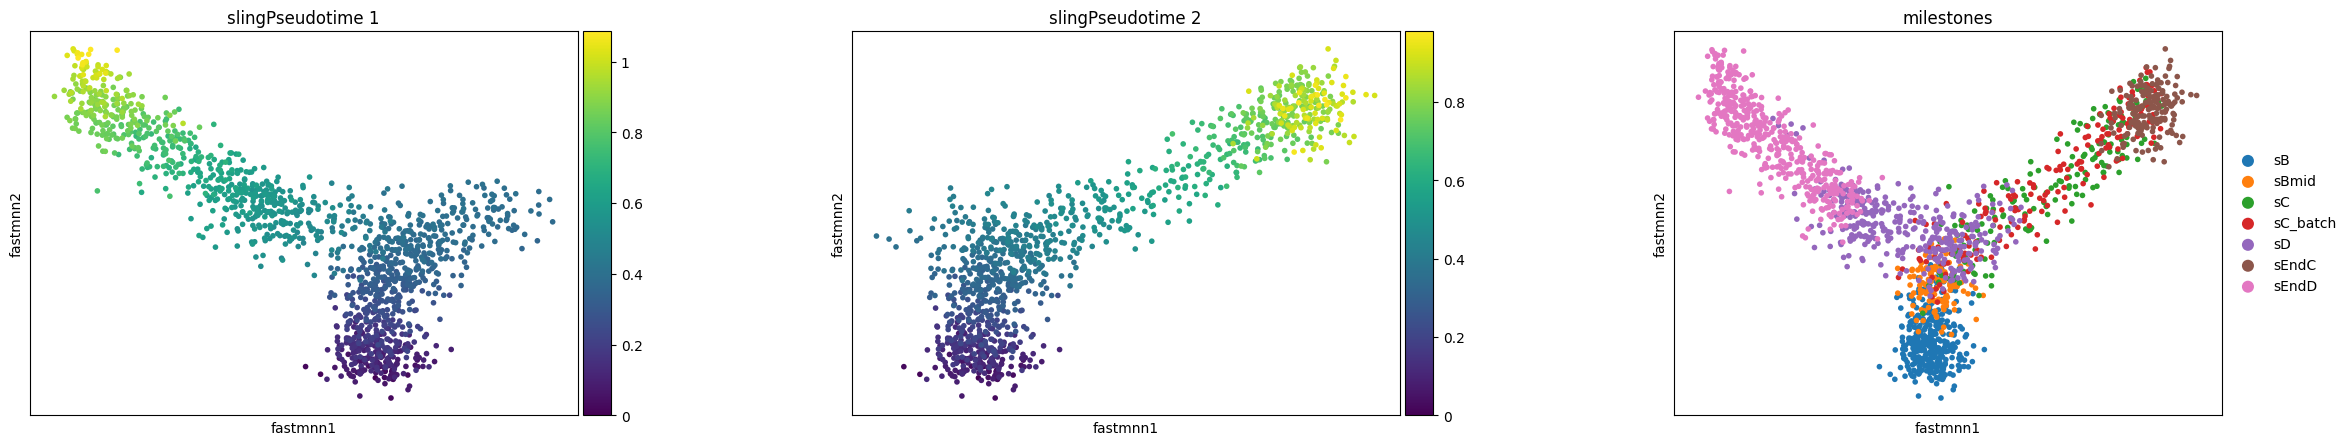

In [5]:
sc.pl.scatter(fastmnn_result, basis = "fastmnn", color = ["slingPseudotime_1", "slingPseudotime_2", "milestones"])

In [6]:
clin = fastmnn_result[~fastmnn_result.obs["slingPseudotime_2"].isna()]

In [7]:
# make category of batches
clin.obs["batch"] = clin.obs["batch"].astype("category")

/tmp/ipykernel_20719/3125932302.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  clin.obs["batch"] = clin.obs["batch"].astype("category")


In [8]:
clin.obs["batch"]

1       0
4       0
5       0
6       0
7       0
       ..
1815    1
1818    1
1820    1
1821    1
1822    1
Name: batch, Length: 1206, dtype: category
Categories (2, int32): [0, 1]

In [9]:
clin.obs["sim_time_norm"] = (clin.obs["sim_time"] - clin.obs["sim_time"].min()) / (clin.obs["sim_time"].max() - clin.obs["sim_time"].min())

View of AnnData object with n_obs × n_vars = 180 × 531
    obs: 'batch', 'milestones', 'sim_time', 'leiden', 'leiden1.5', 'leiden1.4', 'leiden1.25', 'leiden1.3', 'leiden1', 'slingPseudotime_1', 'slingPseudotime_2', 'sim_time_norm'
    uns: 'leiden', 'leiden1', 'leiden1.25', 'leiden1.25_colors', 'leiden1.3', 'leiden1.3_colors', 'leiden1.4', 'leiden1.4_colors', 'leiden1.5', 'leiden1.5_colors', 'leiden1_colors', 'milestones_colors', 'neighbors'
    obsm: 'X_fastmnn', 'corrected'
    layers: 'counts'
    obsp: 'connectivities', 'distances'
View of AnnData object with n_obs × n_vars = 180 × 531
    obs: 'batch', 'milestones', 'sim_time', 'leiden', 'leiden1.5', 'leiden1.4', 'leiden1.25', 'leiden1.3', 'leiden1', 'slingPseudotime_1', 'slingPseudotime_2', 'sim_time_norm'
    uns: 'leiden', 'leiden1', 'leiden1.25', 'leiden1.25_colors', 'leiden1.3', 'leiden1.3_colors', 'leiden1.4', 'leiden1.4_colors', 'leiden1.5', 'leiden1.5_colors', 'leiden1_colors', 'milestones_colors', 'neighbors'
    obsm: 'X

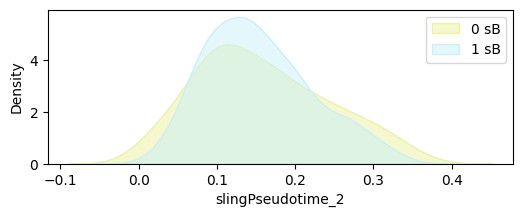

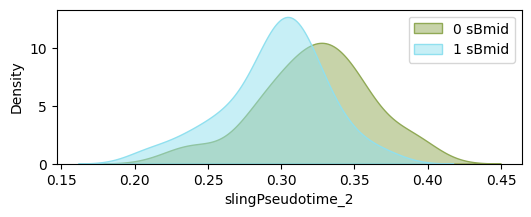

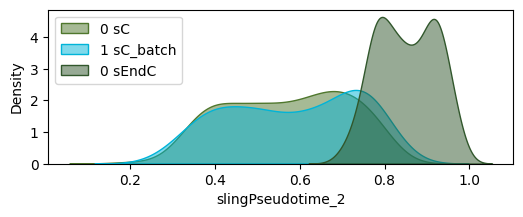

In [10]:
with plt.rc_context(rc={"figure.figsize": (6, 2)}):
    comp_kde(clin, "sB", time_column = "slingPseudotime_2", colors = ["#ecf39e", "#caf0f8"])
    comp_kde(clin, "sBmid",time_column = "slingPseudotime_2", colors = ["#90a955", "#90e0ef"])
    
    kdeplot2(clin, 0, "sC",time = "slingPseudotime_2", milestone_column = "milestones", color="#4f772d")
    kdeplot2(clin, 1, "sC_batch",time = "slingPseudotime_2", milestone_column = "milestones", color="#00b4d8")
    kdeplot2(clin, 0, "sEndC", time = "slingPseudotime_2",milestone_column = "milestones", color="#31572c")
    plt.legend()

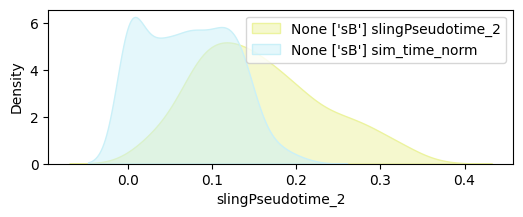

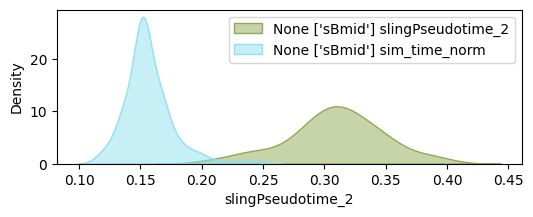

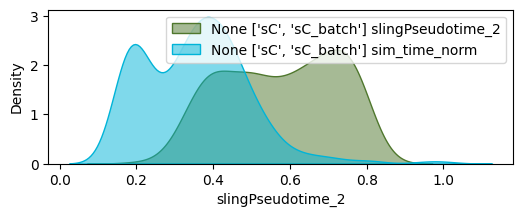

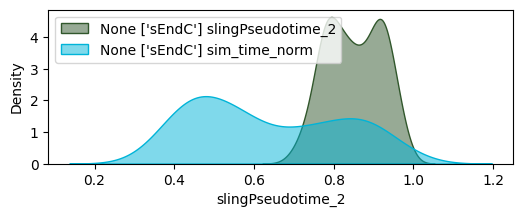

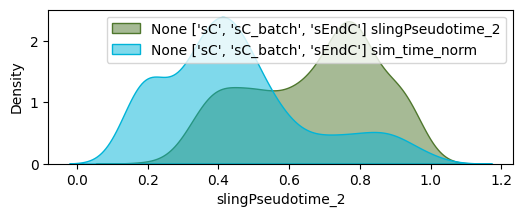

In [12]:
with plt.rc_context(rc={"figure.figsize": (6, 2)}):
    compare(clin, "sB", time1 = "slingPseudotime_2", time2 = "sim_time_norm", colors = ["#ecf39e", "#caf0f8"])
    plt.figure()
    compare(clin, "sBmid", time1 = "slingPseudotime_2", time2 = "sim_time_norm", colors = ["#90a955", "#90e0ef"])
    plt.figure()
    compare(clin, ["sC", "sC_batch"], time1 = "slingPseudotime_2", time2 = "sim_time_norm", colors = ["#4f772d", "#00b4d8"])
    plt.figure()
    compare(clin, "sEndC", time1 = "slingPseudotime_2", time2 = "sim_time_norm", colors = ["#31572c", "#00b4d8"])
    plt.figure()
    compare(clin, ["sC", "sC_batch", "sEndC"], time1 = "slingPseudotime_2", time2 = "sim_time_norm", colors = ["#4f772d", "#00b4d8"])
    

# Metrics

In [1]:
# split in original datasets
d1_clin = clin[clin.obs["batch"] == 0]
d2_clin = clin[clin.obs["batch"] == 1]

NameError: name 'clin' is not defined